# Introduction t Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2023-10-19 05:36:28.516925: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-19 05:36:28.518486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 05:36:28.549644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-19 05:36:28.549676: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-19 05:36:28.549696: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

2.14.0


## Creating data to view and fit

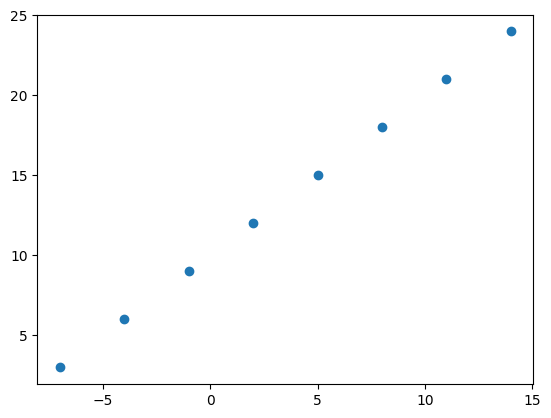

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features (inputs)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and Output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
# Turn our Numpy arrays into Tensor
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

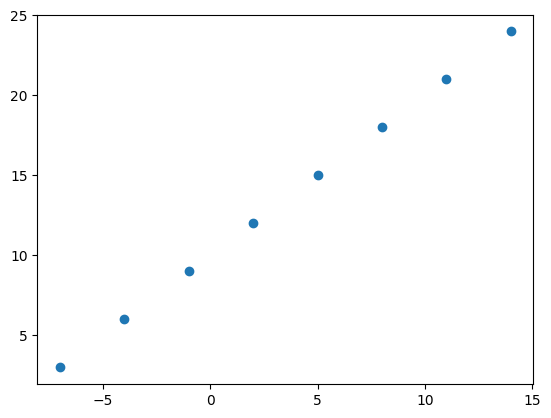

In [7]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels). 

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for measure absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 317ms/step - loss: 16.7706 - mae: 16.7706
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 16.4893 - mae: 16.4893
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 16.2081 - mae: 16.2081
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 15.9268 - mae: 15.9268
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 15.6456 - mae: 15.6456


In [9]:
# Checkout X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Try and make a prediction using our model
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 120ms/step


array([[-9.022293]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 244ms/step - loss: 21.6380 - mae: 21.6380
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 21.2449 - mae: 21.2449
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 20.8517 - mae: 20.8517
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 20.4803 - mae: 20.4803
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 20.1990 - mae: 20.1990
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 19.9178 - mae: 19.9178
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 19.6365 - mae: 19.6365
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 19.3553 - mae: 19.3553
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 19.0740 - mae: 19.0740
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 18.7928 - mae: 18.7928
Epoch 11/100
1/1 [==============================] - 0s 5m

In [12]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Let's see if our models's prediction has improved
model.predict([18.0])

1/1 [==============================] - 0s 42ms/step


array([[31.362625]], dtype=float32)

In [14]:
# Let's see if we can make another to improve our model

# 1. Create the model (with hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 421ms/step - loss: 13.8918 - mae: 13.8918
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3165 - mae: 11.3165
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4964 - mae: 9.4964
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8194 - mae: 7.8194
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 5.8604 - mae: 5.8604
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 4.0129 - mae: 4.0129
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 4.8987 - mae: 4.8987
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 5.7960 - mae: 5.7960
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.0489 - mae: 6.0489
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 5.8074 - mae: 5.8074
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 5

In [15]:
# Let's see if our models's prediction has improved
model.predict([18.0])

1/1 [==============================] - 0s 63ms/step


array([[29.914577]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building a neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation...there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth ( the originals labels)?

In [16]:
# Make a bigger dataset
X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

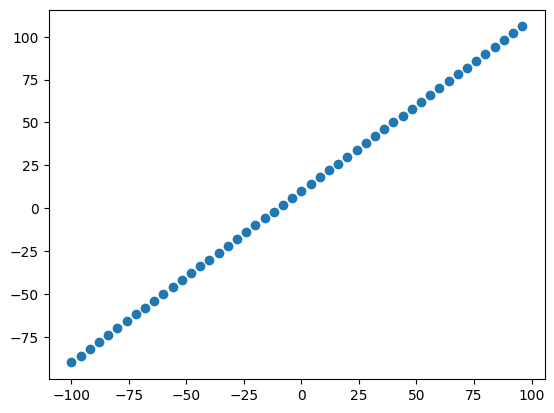

In [18]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [19]:
# Check the length of how many samples we have
len(X)

50

In [20]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

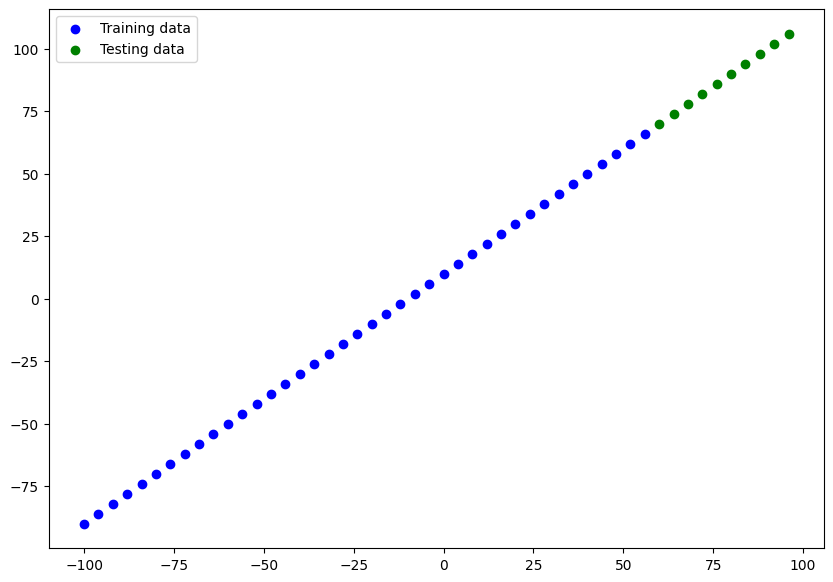

In [21]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data")
# Show a legend
plt.legend()

In [22]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [23]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [35]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameter - these aren't updated during training (this is typical when you bring in already learn patterns or parameters from other model during **transfer learning**).

In [37]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [38]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


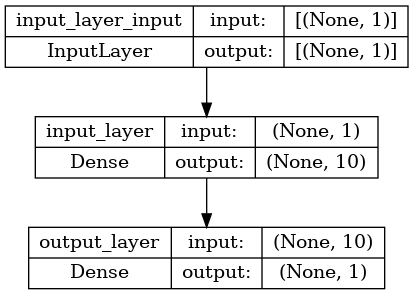

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True, to_file="model.png")

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_set` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [40]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 34ms/step


array([[ 69.51586 ],
       [ 74.03403 ],
       [ 78.55219 ],
       [ 83.070366],
       [ 87.58854 ],
       [ 92.10671 ],
       [ 96.62487 ],
       [101.143036],
       [105.66121 ],
       [110.17938 ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    PLots training data, test data and compares predictions to ground truth label
    :param train_data: 
    :param train_labels: 
    :param test_data: 
    :param test_labels: 
    :param predictions: 
    :return: 
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()

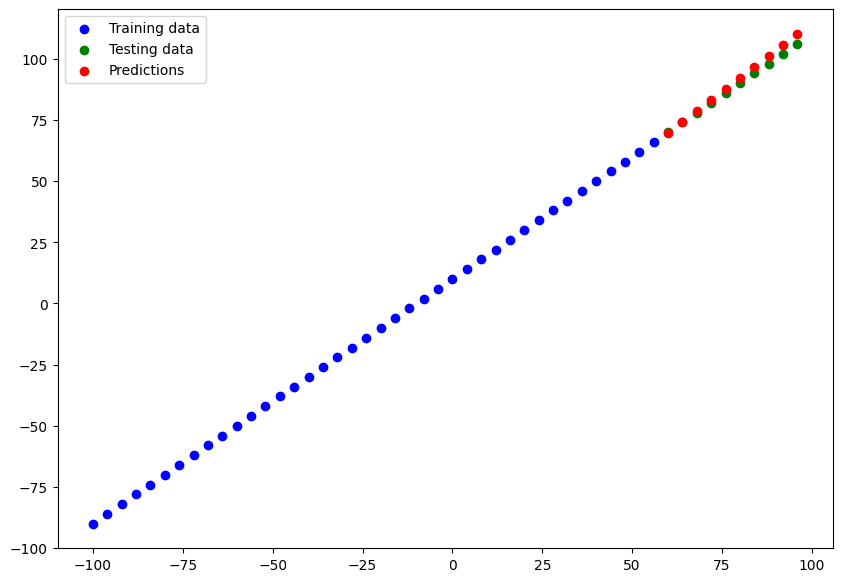

In [43]:
plot_predictions(train_data=X_train, 
                 train_labels=y_train, 
                 test_data=X_test, 
                 test_labels=y_test, 
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [44]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 82ms/step - loss: 1.9444 - mae: 1.9444


[1.9444472789764404, 1.9444472789764404]

In [45]:
y_pred

array([[ 69.51586 ],
       [ 74.03403 ],
       [ 78.55219 ],
       [ 83.070366],
       [ 87.58854 ],
       [ 92.10671 ],
       [ 96.62487 ],
       [101.143036],
       [105.66121 ],
       [110.17938 ]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean absolute error
